In [46]:
import numpy as np
import xarray as xr
import pyqg
from numpy.random import Generator, MT19937, SeedSequence
from pyqg import particles
import os
import yaml
import matplotlib.pyplot as plt

In [10]:
year = 24*60*60*360.
m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=5*year)
m.run()

INFO:  Logger initialized
INFO: Step: 10000, Time: 7.20e+07, KE: 5.09e-04, CFL: 0.106
INFO: Step: 20000, Time: 1.44e+08, KE: 4.62e-04, CFL: 0.086
INFO: Step: 30000, Time: 2.16e+08, KE: 4.53e-04, CFL: 0.088
INFO: Step: 40000, Time: 2.88e+08, KE: 5.26e-04, CFL: 0.091


In [11]:
m_ds = m.to_dataset()
m_ds

<xarray.Dataset>
Dimensions:     (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time        (time) float64 3.11e+08
  * lev         (lev) int64 1 2
  * lev_mid     (lev_mid) float64 1.5
  * x           (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y           (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l           (l) float64 0.0 6.283e-06 1.257e-05 ... -1.257e-05 -6.283e-06
  * k           (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/20)
    q           (time, lev, y, x) float64 -6.996e-06 -2.201e-05 ... -6.297e-08
    u           (time, lev, y, x) float64 0.06309 0.06562 ... 0.006929 0.007135
    v           (time, lev, y, x) float64 0.1094 0.08263 ... 0.006302 0.004486
    ufull       (time, lev, y, x) float64 0.08809 0.09062 ... 0.006929 0.007135
    vfull       (time, lev, y, x) float64 0.1094 0.08263 ... 0.006302 0.004486
    qh          (time, lev, l, k) complex128 (0.00239344347793143+0j) ... (-8...
    ...          ...
    EKE         (lev) float64 0.00222 6.106e-05
    entspec     (l, k) float64 2.291e-07 3.602e-12 ... 2.248e-34 8.998e-44
    APEflux     (l, k) float64 -0.0 9.5e-08 4.129e-07 ... 1.813e-21 4.525e-26
    KEflux      (l, k) float64 0.0 -4.374e-08 4.665e-07 ... 8.437e-20 1.537e-24
    APEgenspec  (l, k) float64 0.0 5.089e-08 -3.265e-07 ... 1.766e-36 -2.744e-45
    APEgen      (time) float64 6.846e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         7200.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         43200
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

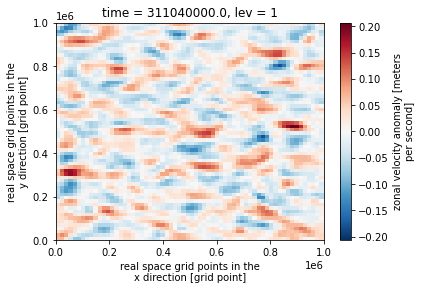

In [31]:
m_ds.u[0,0,:,:].plot()

In [169]:
dpsi_dx = m.ik * m.ph # spectral 
v = m.ifft(dpsi_dx) # inverse FFT, converts signal from freq. domain to time domain

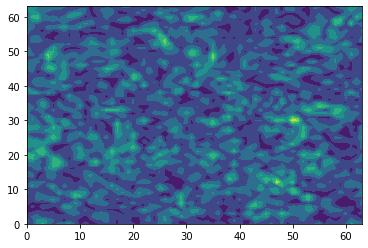

In [158]:
# Strain
strain_normal = m.ifft(2 * m.k * m.l * m.ph)
strain_shear = m.ifft((-m.k**2 + m.l**2)*m.ph)
strain_magnitude = np.sqrt(strain_normal**2 + strain_shear**2)[0]


In [165]:
# Potential Vorticity (two ways)

vort1 = m.ifft(-(m.k**2 + m.l**2)*m.ph)[0]

p = m.ifft(m.ph) 
vort2 = m.q[0] - m.F1*(p[1]-p[0])


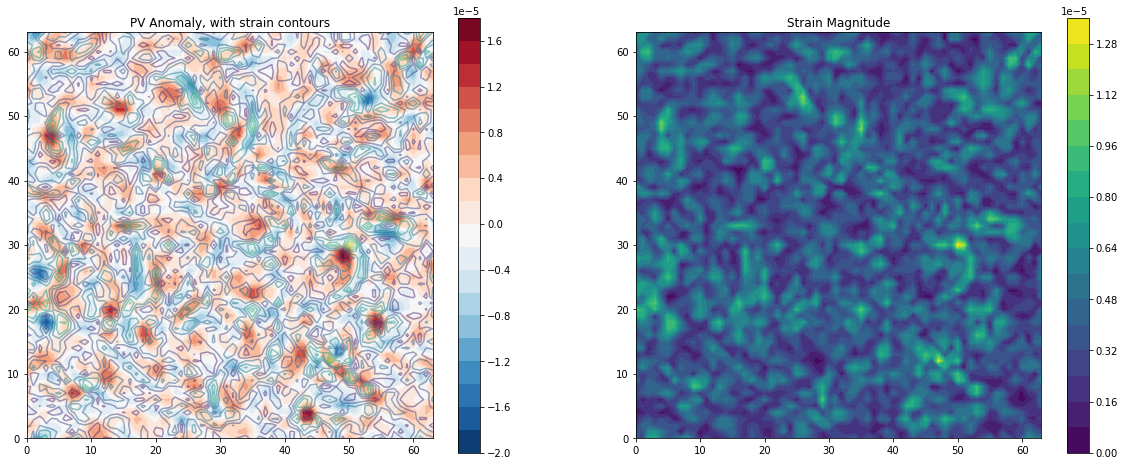

In [168]:
plt.figure(figsize=(20,8))
ax=plt.subplot(121); ax.set_aspect('equal')
plt.contourf(vort1,20, cmap='RdBu_r'); plt.colorbar(); plt.title('PV Anomaly, with strain contours')
plt.contour(strain_magnitude, 10, alpha=0.5)

ax=plt.subplot(122); ax.set_aspect('equal')
plt.contourf(strain_magnitude, 20); plt.colorbar(); plt.title('Strain Magnitude');
